<a href="https://colab.research.google.com/github/ArfaKhalid/Prediction-of-Flight-Delays-using-Classification-Model/blob/main/Prediction_of_Flight_Delays_using_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unveiling the Patterns and Predictions in Pandas
## Step 1 Data Manipulation



In [2]:
# import library and dataset
import pandas as pd
df = pd.read_csv('flightdata.csv')
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


About Data : It consists of on-time arrival information for a major U.S. airline.

# Clean and Prepare Dataset

In [3]:
# Count of Dataset
df.shape

(11231, 26)

# Removing Missing Values

In [4]:
# Step 1 (Find if there is missing values)
df.isnull().values.any()

True

In [5]:
#Step 2 (Which column have the missing values)
df.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

# Select the relevant columns for the Analysis
As the DataFrame contains a lot of missing values, but some of them aren't useful because the columns containing them are not relevant to the model that I am building. The goal of that model is to predict whether a flight I am consider booking is likely to arrive on time. If I know that the flight is likely to be late, I might choose to book another flight.

## Filter out the Columns

In [6]:
# Eliminate the column (column 26) that are created by mistake in csv file
df = df.drop('Unnamed: 25', axis=1)
df.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [7]:
df = df[["MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_DEP_TIME", "ARR_DEL15"]]
df.isnull().sum()

MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_DEP_TIME      0
ARR_DEL15       188
dtype: int64

In [8]:
df[df.isnull().values.any(axis=1)].head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,NaN
179,1,10,7,MSP,DTW,1348,NaN
184,1,10,7,MSP,DTW,625,NaN
210,1,10,7,DTW,MSP,1200,NaN
478,1,22,5,SEA,JFK,2305,NaN


In [9]:
# where NaN is Not a Number so the NaNs in rows 177, 179, and 184 were replaced with 1s indicating that the flights arrived late
df = df.fillna({'ARR_DEL15': 1})
df.iloc[177:185]

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,1.0
178,1,9,6,DTW,JFK,1527,0.0
179,1,10,7,MSP,DTW,1348,1.0
180,1,10,7,DTW,MSP,1540,0.0
181,1,10,7,JFK,ATL,1325,0.0
182,1,10,7,JFK,ATL,610,0.0
183,1,10,7,JFK,SEA,1615,0.0
184,1,10,7,MSP,DTW,625,1.0


# Bining/ Quantization of SCHEDULE_DEPARTURE Column
By dividing each number in this column by 100 and rounded down to the nearest integers like 1030 would become 10, 1925 would become 19 and so on. This would give maximum 24 discrete values in this column because it showing the times flight got delay.


# Categorical Variables
As the dataset's ORIGIN and DEST columns contain airport codes that represent categorical values. These columns need to be converted into discrete columns containing indicator variables, sometimes known as "dummy" variables. In other words, the ORIGIN column, which contains five airport codes, needs to be converted into five columns, one per airport, with each column containing 1s and 0s indicating whether a flight originated at the airport that the column represents same goes with the DEST COLUMN.

In [10]:
#display the head
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,1905,0.0
1,1,1,5,DTW,MSP,1345,0.0
2,1,1,5,ATL,SEA,940,0.0
3,1,1,5,SEA,MSP,819,0.0
4,1,1,5,SEA,DTW,2300,0.0


In [11]:
#To bin the departure times
import math
for index, row in df.iterrows():
    df.loc[index, 'CRS_DEP_TIME'] = math.floor(row['CRS_DEP_TIME'] / 100)
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,19,0.0
1,1,1,5,DTW,MSP,13,0.0
2,1,1,5,ATL,SEA,9,0.0
3,1,1,5,SEA,MSP,8,0.0
4,1,1,5,SEA,DTW,23,0.0


In [12]:
# Dummy variables
df = pd.get_dummies(df, columns=['ORIGIN', 'DEST'])
df.head()


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,1,1,5,19,0.0,1,0,0,0,0,0,0,0,0,1
1,1,1,5,13,0.0,0,1,0,0,0,0,0,0,1,0
2,1,1,5,9,0.0,1,0,0,0,0,0,0,0,0,1
3,1,1,5,8,0.0,0,0,0,0,1,0,0,0,1,0
4,1,1,5,23,0.0,0,0,0,0,1,0,1,0,0,0


# Step 2 Model Building

## Machine Learning Model
Datasets are divided into two datasets for training and testing (80-20) split.
The DataFrame is divided into feature columns and label columns. The former contains the columns used as input to the model (for example, the flight's origin and destination and the scheduled departure time), while the latter contains the column that the model will attempt to predict — in this case, the ARRIVAL_DELAY column, which indicates whether a flight will arrive on time.

The first statement imports scikit-learn's train_test_split helper function. The second line uses the function to split the DataFrame into a training set containing 80% of the original data, and a test set containing the remaining 20%. The random_state parameter seeds the random-number generator used to do the splitting, while the first and second parameters are DataFrames containing the feature columns and the label column.

In [13]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df.drop('ARR_DEL15', axis=1), df['ARR_DEL15'], test_size=0.2, random_state=42)

train_test_split returns four DataFrames. The following command display the number of rows and columns in the DataFrame containing the feature columns used for training.

In [14]:
train_x.shape

(8984, 14)

This command to display the number of rows and columns in the DataFrame containing the feature columns used for testing.

In [15]:
test_x.shape

(2247, 14)

# Classification Model
 This model is a binary classification model that predicts whether a flight will arrive on-time or late. It is "binary" because there are only two possible outputs.
 ## RandomForestClassifier (scikit-learn)
 It fits multiple decision trees to the data and uses averaging to boost the overall accuracy and limit overfitting.

# Train Model

In [16]:
from sklearn.ensemble import RandomForestClassifier
# TRAINING MODEL
model = RandomForestClassifier(random_state=13)
model.fit(train_x, train_y)

RandomForestClassifier(random_state=13)

# Test Model
The predict method is used to test the model using the values in test_x, followed by the score method to determine the mean accuracy of the model.

In [17]:
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.8642634623943035

# Measures for a binary classification model
Area Under Receiver Operating Characteristic Curve : quantifies how often the model will make a correct prediction regardless of the outcome.


# Confidence Intervals
- Prediction Probabilities for the test set
- These probabilities are estimates for each of the classes, or answers, the model can predict.
- The sum of the two probabilities adds up to 100%.

In [18]:
# set of prediction probabilities from the test data
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)

# ROC AUC score (Accuracy of Model)


In [19]:
roc_auc_score(test_y, probabilities[:, 1])

0.7014819895830565

# Insights
- Why AUC Score Differs from Mean Accuracy:
1. The mean accuracy measures overall correctness, but it can be skewed when dealing with imbalanced datasets, like above, where on-time arrivals outnumber late arrivals.
2. Accuracy Score: Heavily influenced by the abundance of on-time instances, making on-time predictions more likely to be correct.
3. AUC Score: Considers both true positives and true negatives, providing a more robust evaluation by accounting for imbalances in class distribution. It assesses the model's ability to distinguish between on-time and late arrivals, considering the trade-offs between false positives and false negatives.
## Confusion Matrix also known as error Matrix (Model Behaviour)
1. The confusion matrix quantifies the number of times each answer was classified correctly or incorrectly.
2. It quantifies the number of false positives, false negatives, true positives, and true negatives.

In [20]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[1903,   33],
       [ 272,   39]])

# Insights
1. Rows of Confusion Matrix: (second-row : Flight delayed)
2. First Column: Shows the count of delayed flights incorrectly predicted as on time.
3. Second Column: Displays the count of flights correctly predicted as delayed.
4. Model's Prediction Proficiency: The model struggles more with predicting flight delays compared to predicting on-time arrivals.
5. Desired Confusion Matrix Pattern: Aim for large numbers in the upper-left (correctly predicted on-time) and lower-right (correctly predicted delayed) corners.
Preferably, small numbers (or zeros) in the upper-right (incorrectly predicted on-time) and lower-left (incorrectly predicted delayed) corners.

# Other measures of accuracy for a classification model ( precision and recall)

In [21]:
# precision_score for computing precision
from sklearn.metrics import precision_score
train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

1.0

In [ ]:
#recall_score for computing recall
from sklearn.metrics import recall_score
recall_score(train_y, train_predictions)

0.9992012779552716

# Steps for Model Improvement
1. Algorithm Exploration: Experiment with different algorithms to find the best fit.
2. Parameter Tuning: Fine-tune chosen algorithms for optimal performance.
3. Dataset Expansion: Increase dataset size to millions of rows for more robust training.
4. Imbalance Reduction: Address imbalance between late and on-time arrivals for better model generalization.

# Visualize Output of the Model

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Roc_Curve

Text(0, 0.5, 'True Positive Rate')

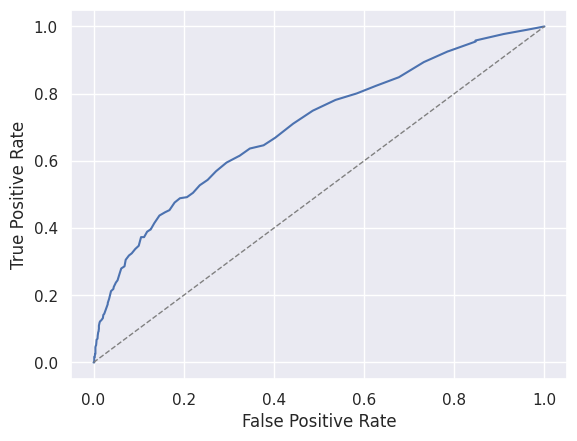

In [23]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_y, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

The dotted line in the middle of the graph represents a 50-50 chance of obtaining a correct answer. The blue curve represents the accuracy of the model.

In [24]:
# Function to analyze several flights
def predict_delay(departure_date_time, origin, destination):
    from datetime import datetime

    try:
        departure_date_time_parsed = datetime.strptime(departure_date_time, '%d/%m/%Y %H:%M:%S')
    except ValueError as e:
        return 'Error parsing date/time - {}'.format(e)

    month = departure_date_time_parsed.month
    day = departure_date_time_parsed.day
    day_of_week = departure_date_time_parsed.isoweekday()
    hour = departure_date_time_parsed.hour

    origin = origin.upper()
    destination = destination.upper()

    input = [{'MONTH': month,
              'DAY_OF_MONTH': day,
              'DAY_OF_WEEK': day_of_week,
              'CRS_DEP_TIME': hour,
              'ORIGIN_ATL': 1 if origin == 'ATL' else 0,
              'ORIGIN_DTW': 1 if origin == 'DTW' else 0,
              'ORIGIN_JFK': 1 if origin == 'JFK' else 0,
              'ORIGIN_MSP': 1 if origin == 'MSP' else 0,
              'ORIGIN_SEA': 1 if origin == 'SEA' else 0,
              'DEST_ATL': 1 if destination == 'ATL' else 0,
              'DEST_DTW': 1 if destination == 'DTW' else 0,
              'DEST_JFK': 1 if destination == 'JFK' else 0,
              'DEST_MSP': 1 if destination == 'MSP' else 0,
              'DEST_SEA': 1 if destination == 'SEA' else 0 }]

    return model.predict_proba(pd.DataFrame(input))[0][0]

# Prediction Examples


In [25]:
# A flight from New York to Atlanta on the evening of October 1 will arrive on time.
predict_delay('1/10/2018 21:45:00', 'JFK', 'ATL')

0.88

In [26]:
# the probability that the same flight a day later will arrive on time
predict_delay('2/10/2018 21:45:00', 'JFK', 'ATL')

0.87

In [27]:
# compute the probability that a morning flight the same day from Atlanta to Seattle will arrive on time
predict_delay('2/10/2018 10:00:00', 'ATL', 'SEA')

0.99

# Probability Plot of on-time arrivals for an evening flight from JFK to ATL over a range of days

(0.0, 1.0)

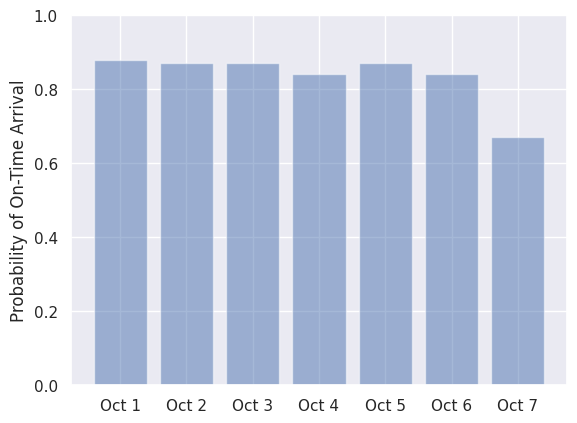

In [28]:
import numpy as np

labels = ('Oct 1', 'Oct 2', 'Oct 3', 'Oct 4', 'Oct 5', 'Oct 6', 'Oct 7')
values = (predict_delay('1/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('2/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('3/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('4/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('5/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('6/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('7/10/2018 21:45:00', 'JFK', 'ATL'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))

# Probability Plot of on-time arrivals for an evening flight from JFK to MSP over a range of days

(0.0, 1.0)

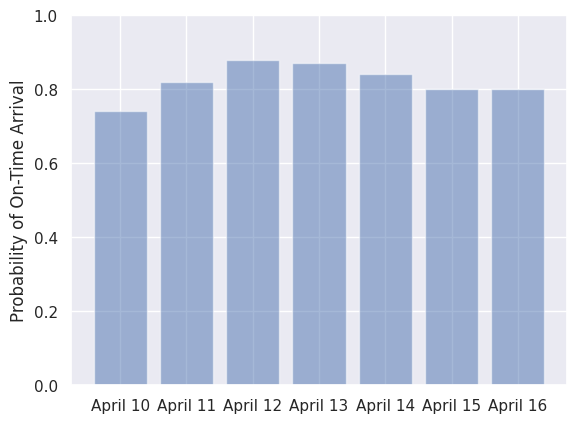

In [29]:
# flights leaving JFK for MSP at 1:00 p.m. on April 10 through April 16.
import numpy as np

labels = ('April 10', 'April 11', 'April 12', 'April 13', 'April 14', 'April 15', 'April 16')
values = (predict_delay('1/10/2018 14:00:00', 'JFK', 'MSP'),
          predict_delay('2/10/2018 14:00:00', 'JFK', 'MSP'),
          predict_delay('3/10/2018 14:00:00', 'JFK', 'MSP'),
          predict_delay('4/10/2018 14:00:00', 'JFK', 'MSP'),
          predict_delay('5/10/2018 14:00:00', 'JFK', 'MSP'),
          predict_delay('6/10/2018 14:00:00', 'JFK', 'MSP'),
          predict_delay('7/10/2018 14:00:00', 'JFK', 'MSP'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))